<a href="https://colab.research.google.com/github/AlfonsoPiedrabuena/proyecto_machinelearning/blob/main/Clasificaci%C3%B3n_Modulo_MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Información sobre el dataset en la siguiente liga:
https://www.kaggle.com/aljarah/xAPI-Edu-Data

In [59]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
sns.set(style = "whitegrid")
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [11]:
df_data_raw = pd.read_csv('https://raw.githubusercontent.com/AlfonsoPiedrabuena/proyecto_machinelearning/main/xAPI-Edu-Data.csv')
df_data_raw.head(5)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [87]:
df_data_raw['NationalITy'].replace({
    'KW':1,
    'lebanon':2,
    'Egypt':3,
    'SaudiArabia':4,
    'USA':5,
    'Jordan':6, 
    'venzuela':7, 
    'Iran':8,
    'Tunis':9,
    'Morocco':10,
    'Syria':11,
    'Palestine':12,
    'Iraq':13,
    'Lybia':14
})

TypeError: ignored

In [77]:
df_data_raw

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,1,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,1,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,1,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,1,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,1,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,6,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,6,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,6,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,6,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


###Para consultar las diferentes variables

In [8]:
df_columns = df_data_raw.columns


In [10]:
for x in df_columns:
  print(df_data_raw[str(x)].unique())


['M' 'F']
['KW' 'lebanon' 'Egypt' 'SaudiArabia' 'USA' 'Jordan' 'venzuela' 'Iran'
 'Tunis' 'Morocco' 'Syria' 'Palestine' 'Iraq' 'Lybia']
['KuwaIT' 'lebanon' 'Egypt' 'SaudiArabia' 'USA' 'Jordan' 'venzuela' 'Iran'
 'Tunis' 'Morocco' 'Syria' 'Iraq' 'Palestine' 'Lybia']
['lowerlevel' 'MiddleSchool' 'HighSchool']
['G-04' 'G-07' 'G-08' 'G-06' 'G-05' 'G-09' 'G-12' 'G-11' 'G-10' 'G-02']
['A' 'B' 'C']
['IT' 'Math' 'Arabic' 'Science' 'English' 'Quran' 'Spanish' 'French'
 'History' 'Biology' 'Chemistry' 'Geology']
['F' 'S']
['Father' 'Mum']
[ 15  20  10  30  40  42  35  50  12  70  19   5  62  36  55  69  60   2
   0   8  25  75   4  45  14  33   7  13  29  39  49  16  28  27  21  80
  17  65  22  11   1   3 100   6  90  77  24  66  23  82  72  51  85  87
  95  81  53  92  83  67  96  57  73   9  32  52  59  61  79  18  74  97
  41  71  98  78  89  88  86  76  99  84]
[16 20  7 25 50 30 12 10 21 80 88  6  1 14 70 40 13 15 60  0  2 19 85 90
  5 22 11 54 35 33  4 39 75 69  3  8 89 44 92 26 27 29 98 

###Revisar el tipo de datos con el que se trabajará 

In [78]:
print(df_data_raw.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    int64 
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

###Obtenemos información estadística

In [16]:
columns_describe = df_data_raw[['raisedhands','VisITedResources','AnnouncementsView','Discussion']]
print(columns_describe.describe().T)

                   count       mean        std  min    25%   50%   75%    max
raisedhands        480.0  46.775000  30.779223  0.0  15.75  50.0  75.0  100.0
VisITedResources   480.0  54.797917  33.080007  0.0  20.00  65.0  84.0   99.0
AnnouncementsView  480.0  37.918750  26.611244  0.0  14.00  33.0  58.0   98.0
Discussion         480.0  43.283333  27.637735  1.0  20.00  39.0  70.0   99.0


In [20]:
# Estandarizar variables
ss = StandardScaler()
X_ss = ss.fit_transform(columns_describe)

In [22]:
# Crear la instancia PCA y ajustar los datos
pca = PCA()
pca.fit(X_ss)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

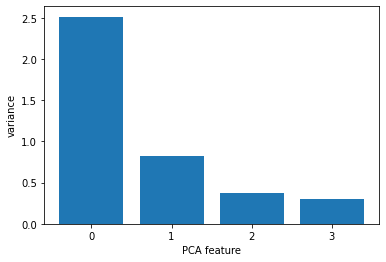

In [23]:
# Gráfica de varianza explicada
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

In [31]:
# Generemos la instancia indicando el número de componentes a retener
pca = PCA(n_components = 2)

# Ajustamos y transformamos los datos
pca_features = pca.fit_transform(X_ss)
#print(pca_features)
#print(pca_features.shape)

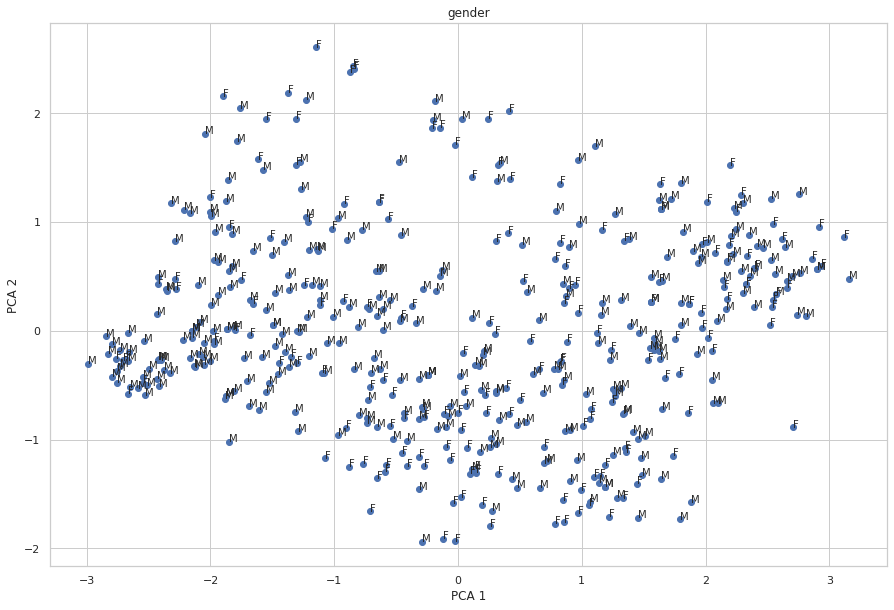

In [49]:
# Asignamos los componentes a dos variables
xs = pca_features[:,0]
ys = pca_features[:,1]

#Extraemos las etiquetas de las entidades
ent = df_data_raw['gender']
ent = np.asarray(ent)

# Generemos el diagrama de dispersión
plt.figure(figsize=(15, 10))
plt.scatter(xs, ys)

for i, n in enumerate(ent):
    plt.annotate(n, (xs[i], ys[i]))
    
plt.title('gender')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.show()

###KMedias 
Para formar clústeres, pero antes de eso, realizaremos un análisis exploratorio para definir el número adecuado de clústeres.

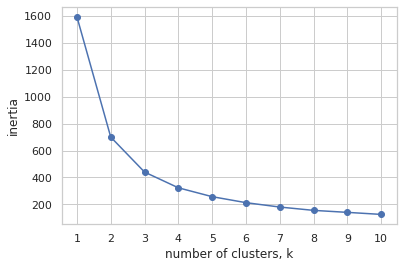

In [50]:
## Probar con distintos números de clústeres y comparar su inercia
ks = range(1, 11)
inertias = []

for k in ks:
    model = KMeans(n_clusters = k)
    model.fit(pca_features)
    inertias.append(model.inertia_)
    
# Gráfico de sedimentación para ver las incercias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

[5 5 5 5 4 1 5 5 1 4 4 5 5 5 4 4 4 4 4 4 4 1 1 1 1 1 1 5 0 3 4 5 1 1 1 5 5
 4 5 4 1 1 5 4 4 1 5 4 4 4 1 1 3 4 5 5 5 5 4 1 5 3 2 5 5 5 5 4 3 5 5 5 5 5
 5 4 4 3 5 0 1 1 1 1 3 5 4 1 5 1 1 0 3 0 3 0 1 5 5 1 2 0 5 5 5 1 5 0 5 3 0
 2 1 1 1 1 3 5 5 4 1 5 0 3 5 5 1 5 5 3 5 4 5 1 4 2 2 0 2 2 5 3 3 0 5 0 2 3
 3 2 0 4 0 4 3 2 4 3 3 4 0 2 4 0 0 2 0 0 3 5 0 3 5 5 0 1 3 3 3 3 2 3 0 1 5
 0 4 0 0 3 1 5 0 0 0 3 0 0 1 3 4 4 5 4 5 3 3 5 3 2 0 3 0 5 5 5 4 0 2 3 3 3
 0 4 2 3 1 5 2 5 3 5 4 0 4 5 5 2 2 2 2 2 5 1 2 4 2 2 3 0 1 3 2 1 2 1 2 2 2
 3 5 2 4 3 3 0 3 3 5 5 0 0 5 5 2 2 3 3 3 3 0 0 2 2 3 4 2 2 2 2 4 5 2 2 2 2
 2 2 5 5 5 5 5 1 1 4 2 2 2 2 5 4 0 0 2 2 0 0 3 3 3 3 5 5 5 1 5 5 2 2 4 1 3
 3 5 5 3 3 3 3 3 3 0 3 3 3 3 3 5 5 5 5 3 3 3 3 3 3 0 0 3 3 0 0 0 3 4 4 0 0
 5 5 1 1 1 5 4 4 4 4 1 1 3 0 0 0 4 4 5 5 0 0 0 0 0 2 0 2 2 2 3 3 2 2 2 2 5
 5 3 3 3 3 0 2 5 5 2 2 2 2 0 0 0 0 2 2 0 0 1 1 0 0 2 2 0 0 0 0 0 0 0 0 2 2
 0 0 2 2 2 2 3 3 3 3 2 4 0 0 2 2 2 2 2 2 2 2 2 2 1 1 0 2 2 2 5 5 3 3 1 1]


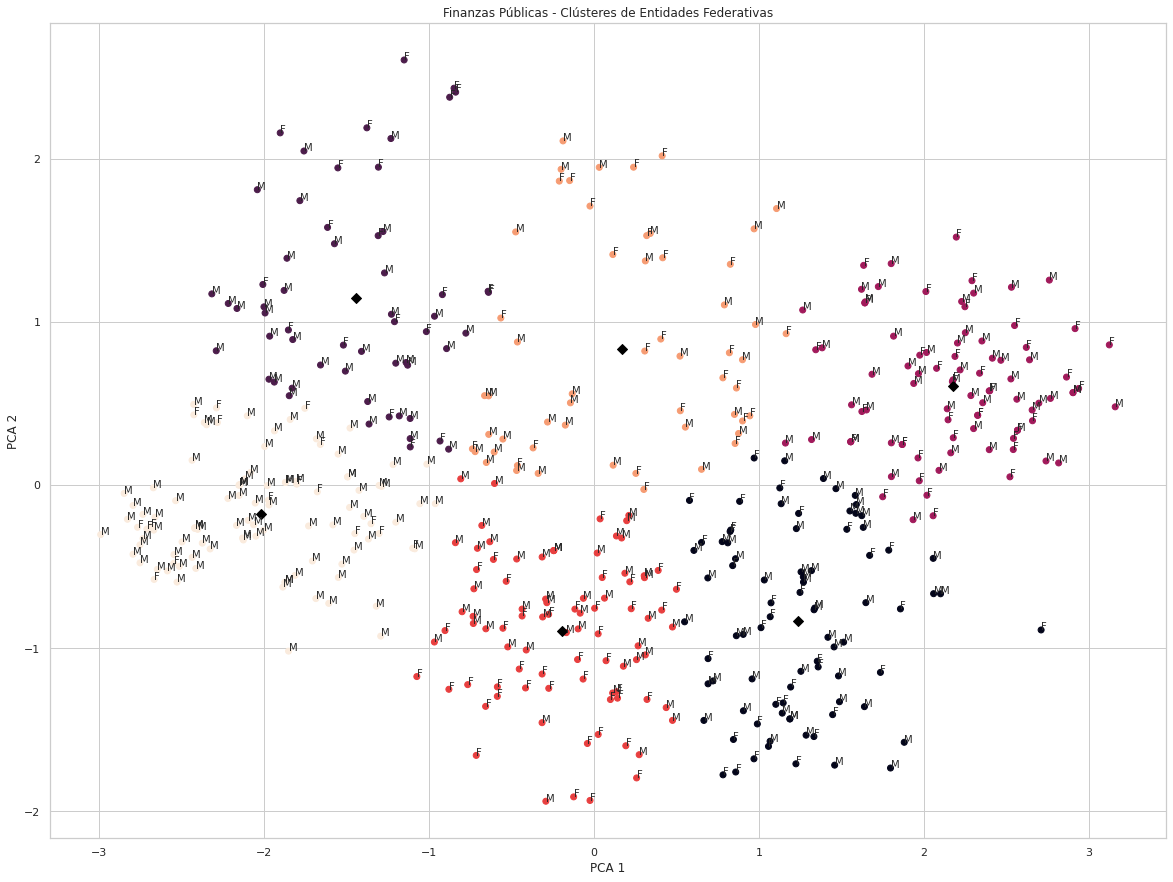

In [51]:
# Generamos nuestra instancia con 6 clústeres
model = KMeans(n_clusters = 6)

# Ajustamos el modelo a nuestros datos y predecimos los centroides
labels = model.fit_predict(pca_features)
print(labels)

# Obtenemos los centroides y separamos sus coordenadas
centroids = model.cluster_centers_

centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Observemos nuevamente nuestro gráfico de dispersión con la clusterización de las entiades federativas
plt.figure(figsize = (20, 15))

plt.scatter(xs, ys, c = labels)
plt.scatter(centroids_x, centroids_y, marker="D", s=50, color = 'black')

for i, n in enumerate(ent):
    plt.annotate(n, (xs[i], ys[i]))
    
plt.title('Seguimiento de personas por género en el uso de la herramienta')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

###Análisis Exploratorio de Datos (EDA)

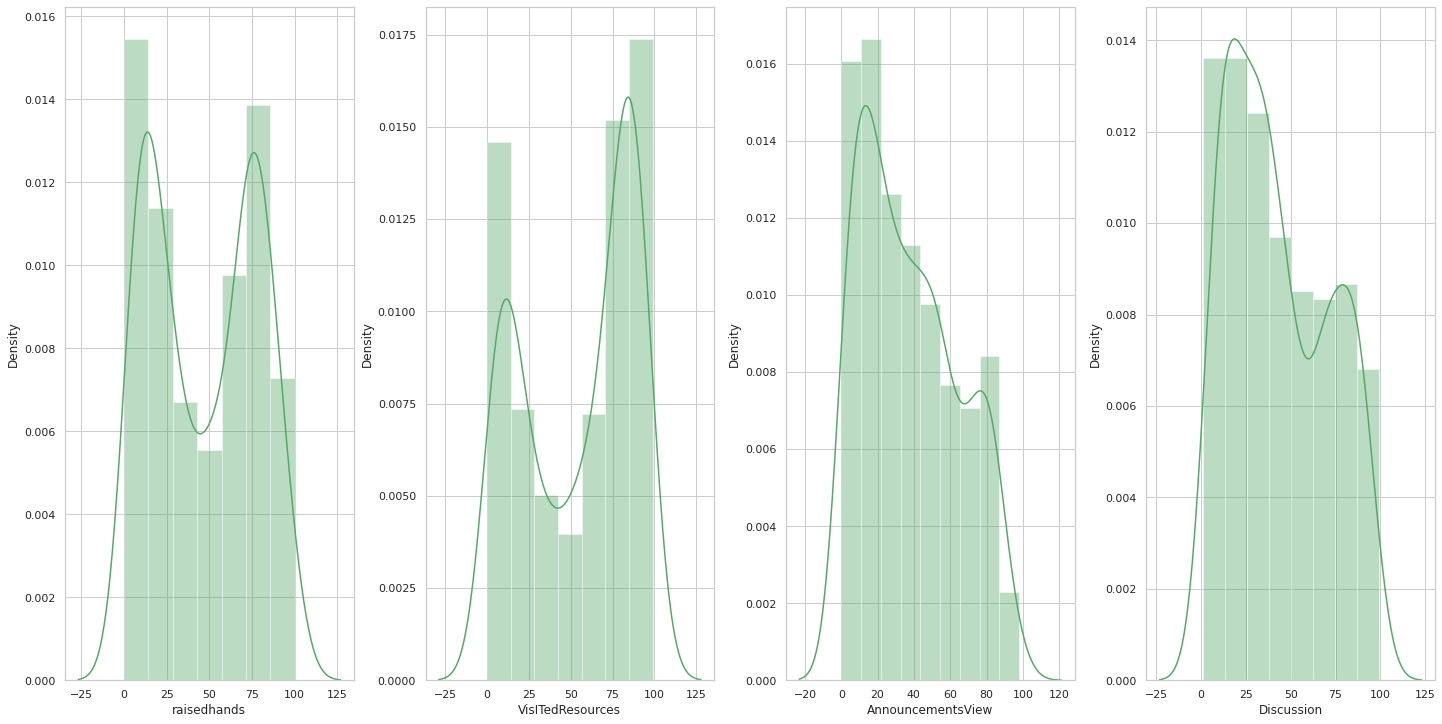

In [42]:
fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in columns_describe.items():
    sns.distplot(value, color='g', ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

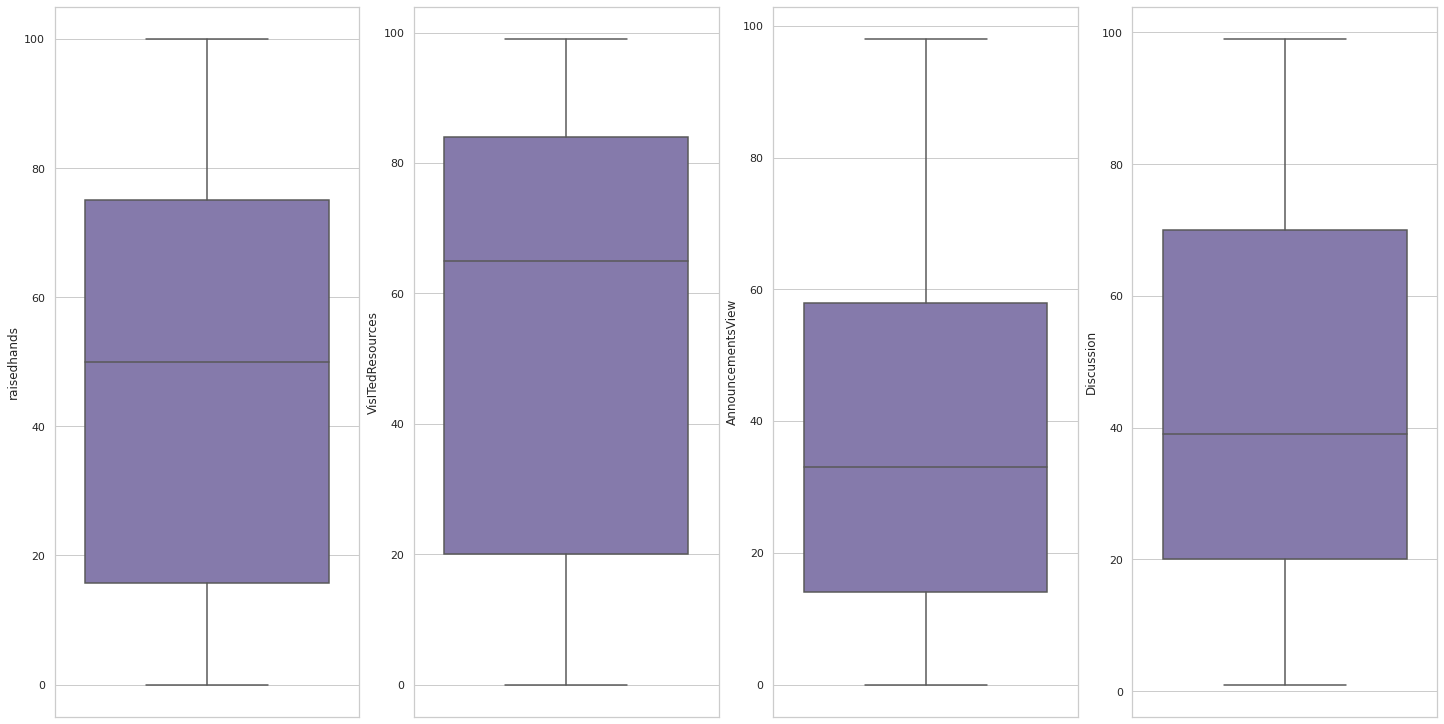

In [47]:
fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in columns_describe.items():
    sns.boxplot(y=col, data=columns_describe, color='m', ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

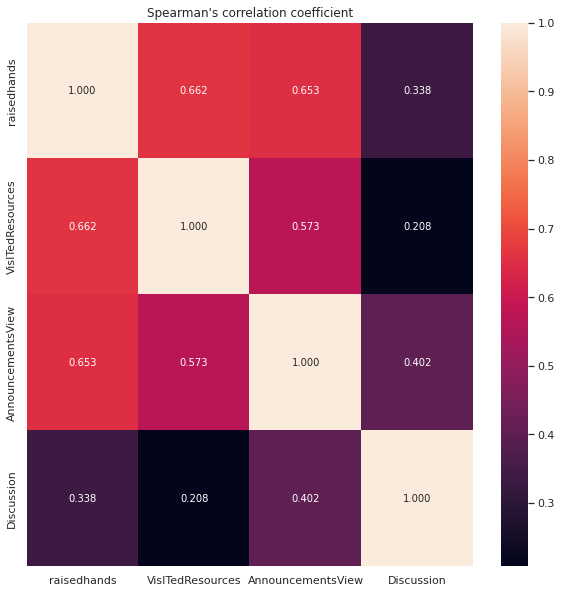

In [53]:
corr_spearman = columns_describe.corr(method = 'spearman')
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr_spearman, annot = True, fmt=".3f").set_title(
    "Spearman's correlation coefficient")
plt.show()

In [55]:
ss = PowerTransformer()
X_scaled = ss.fit_transform(columns_describe)

df_scaled = pd.DataFrame(X_scaled)
print(df_scaled.describe().T.round(2))

   count  mean  std   min   25%   50%   75%   max
0  480.0   0.0  1.0 -2.02 -0.95  0.25  0.91  1.48
1  480.0  -0.0  1.0 -1.86 -1.00  0.37  0.87  1.25
2  480.0   0.0  1.0 -2.06 -0.82  0.02  0.81  1.78
3  480.0  -0.0  1.0 -2.25 -0.76  0.03  0.97  1.67


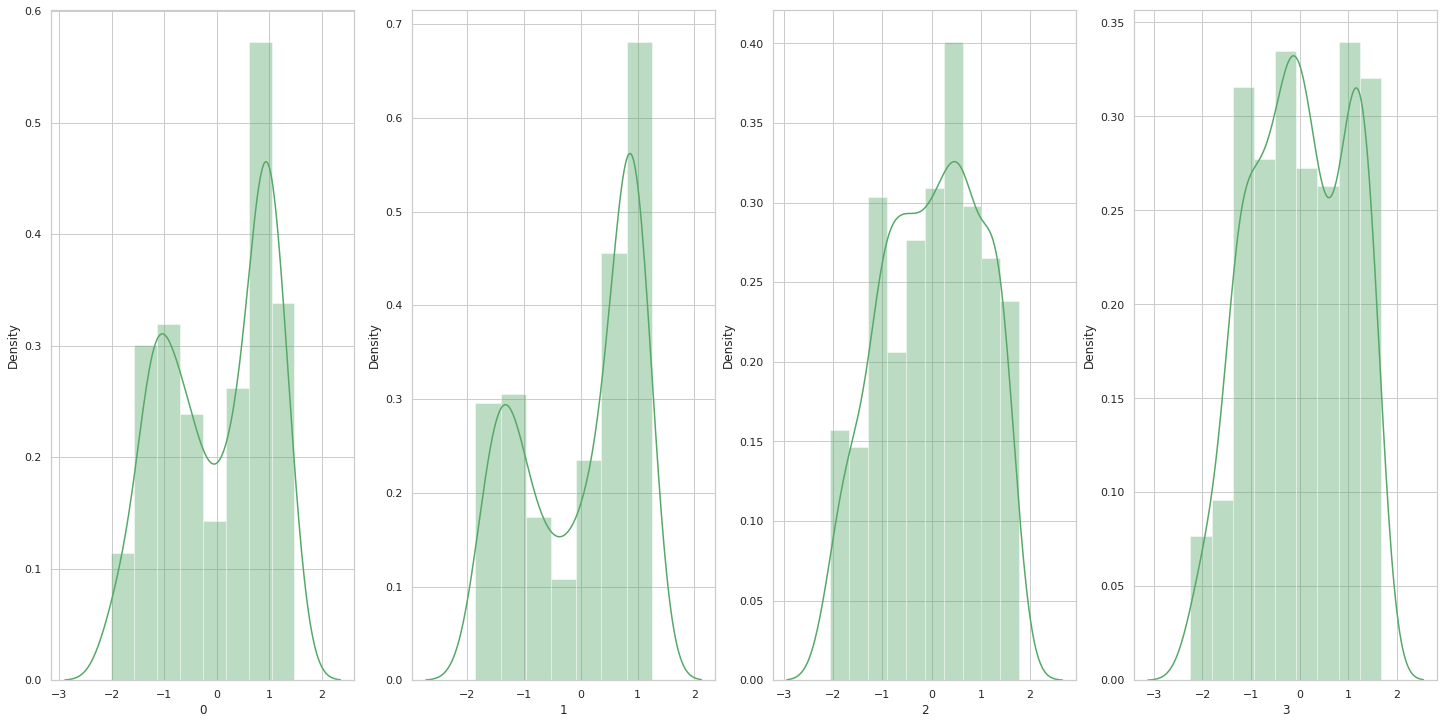

In [57]:
fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df_scaled.items():
    sns.distplot(value, color='g', ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

(480,)
    y_variable  percentage_count
13           7          0.002083
12          10          0.008333
9           14          0.012500
10           8          0.012500
11           5          0.012500
8           11          0.014583
7            3          0.018750
6            4          0.022917
5            9          0.025000
4            2          0.035417
3           13          0.045833
2           12          0.058333
1            6          0.358333
0            1          0.372917


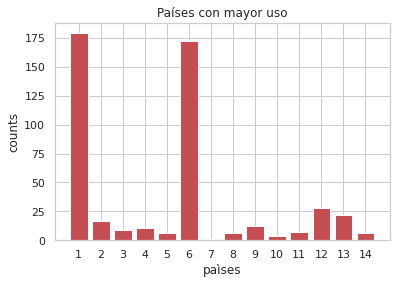

In [80]:
y = df_data_raw["NationalITy"]
print(y.shape)
print(y.value_counts(normalize = True).reset_index().rename(columns = {'index': 'y_variable', 'NationalITy': 'percentage_count'}).sort_values(by = "percentage_count"))

labels, counts = np.unique(y, return_counts=True)
plt.bar(labels, counts, align='center', color = "r")
plt.title("Países con mayor uso")
plt.xlabel("paìses")
plt.ylabel("counts")
plt.xticks(labels)
plt.show()

In [88]:
y_binary = np.where(y >= 12, 1, 0)

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_binary, test_size = 0.25, random_state = 22)

print("X_train shape: "+str(X_train.shape[0]), "y_train shape: "+str(y_train.shape[0]), sep = "\n")
print("X_test shape:"+str(X_test.shape[0]), "y_test shape:"+str(y_test.shape[0]), sep = "\n")

X_train shape: 360
y_train shape: 360
X_test shape:120
y_test shape:120


###Clúster por vecinos más cercanos

In [90]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier() #Genera el modelo
KNN.fit(X_train, y_train)   #Entrena el modelo
y_pred_knn = KNN.predict(X_test)   #Genera la predicción

In [91]:
print("Precisión del modelo en el subconjunto de entrenamiento: {}".format(KNN.score(X_train, y_train).round(2)))
print("Precisión del modelo en el subconjunto de prueba: {}".format(KNN.score(X_test, y_test).round(2)))

Precisión del modelo en el subconjunto de entrenamiento: 0.91
Precisión del modelo en el subconjunto de prueba: 0.9


Clasificador ingenuo de Bayes

In [92]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()
NaiveBayes.fit(X_train, y_train) #Entrena el modelo
y_pred_nb = NaiveBayes.predict(X_test) #Genera la predicción

In [93]:
print("Precisión del modelo en el subconjunto de entrenamiento: {}".format(NaiveBayes.score(X_train, y_train).round(2)))
print("Precisión del modelo en el subconjunto de prueba: {}".format(NaiveBayes.score(X_test, y_test).round(2)))

Precisión del modelo en el subconjunto de entrenamiento: 0.88
Precisión del modelo en el subconjunto de prueba: 0.87
